In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
raw_train_data = pd.read_excel('Data_Train.xlsx',sheet_name='Sheet1')
raw_test_data = pd.read_excel('Test_set.xlsx',sheet_name='Sheet1')

In [207]:
train = raw_train_data.copy()

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
def time_fix(time):
    if 'm' in list(time):
        return 0
    else:
        return int(time)

In [8]:
def add_info_fix(info):
    if info == 'No info':
        return info
    elif info == 'In-flight meal not included':
        return info
    elif info == 'No check-in baggage included':
        return info
    elif info == '1 Long layover':
        return info
    elif info == 'Change airports':
        return info
    else:
        return 'Other'

In [147]:
def airline_fix(info):
    if info == 'Jet Airways':
        return info
    elif info == 'IndiGo':
        return info
    elif info == 'Air India':
        return info
    elif info == 'Multiple carriers':
        return info
    elif info == 'SpiceJet':
        return info
    elif info == 'Vistara':
        return info
    elif info == 'Air Asia':
        return info
    elif info == 'GoAir':
        return info
    else:
        return 'Other'

In [203]:
def preprocessing(df):
    
    
    
    # Drop top 0.5% of price (outliers)
    df = df[df['Price'] < df['Price'].quantile(0.995)]
    
    df.dropna(inplace=True)
    
    # Create Trip column for Source to Dest
    df['Trip'] = df['Source'] + ' to ' + df['Destination']
    
    # Drop route
    df.drop('Route',axis=1,inplace=True)
    
    # Change Date_of_Journey to datetime obj
    df['Date_of_Journey'] = df['Date_of_Journey'].apply(lambda x: pd.to_datetime(x,infer_datetime_format=True))
    
    # Create month/day/hour columns
    df['Dep_Month'] = df['Date_of_Journey'].apply(lambda x:x.month)
    df['Dep_Day'] = df['Date_of_Journey'].apply(lambda x:x.day)
    df['Dep_Hr'] = df['Dep_Time'].apply(lambda x: pd.to_datetime(x))
    df['Dep_Hr'] = df['Dep_Hr'].apply(lambda x: x.hour)
    
    # Change arrival time to arrival hour
    df['Arrival_Hr'] = df['Arrival_Time'].apply(lambda x: pd.to_datetime(x))
    df['Arrival_Hr'] = df['Arrival_Hr'].apply(lambda x: x.hour)

    # Drop Arrival time columns
    df.drop('Arrival_Time',axis=1,inplace=True)
    
    # drop Date_of_Journey column
    df.drop('Date_of_Journey',axis=1,inplace=True)
    
    # drop Dep_Time column
    df.drop('Dep_Time',axis=1,inplace = True)
    
    # Change duration to Dur_Hrs
    df['Dur_Hrs'] = df['Duration'].apply(lambda x: x.split('h')[0])
    df['Dur_Hrs'] = df['Dur_Hrs'].apply(time_fix)
    
    df.drop('Duration',axis=1,inplace=True)
    
    # Change total stops to number
    df['Total_Stops'] = df['Total_Stops'].apply(lambda x: 0 if x == 'non-stop' else int(x[0]))
    
    # Fix no info
    df = df.replace('No Info','No info')
    
    # Slim the categories on Additional_Info by using Other
    df['Additional_Info'] = df['Additional_Info'].apply(add_info_fix)
    
    # Fix Airline to slim categories and group low items as other
    df['Airline'] = df['Airline'].apply(airline_fix)
    
    #Get dummies
    df = pd.get_dummies(data=df,columns=['Airline', 'Source', 'Destination','Additional_Info','Trip'],drop_first=True)
    

    
    
    return df

# EDA

### Exploring Price based on 'Source to Dest' combo

<AxesSubplot:xlabel='Trip'>

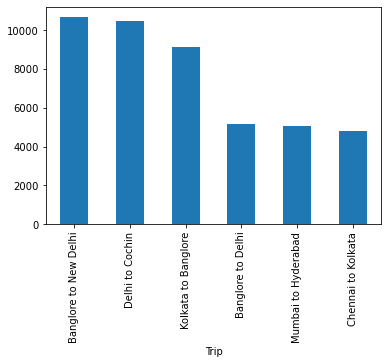

In [12]:
train.groupby('Trip')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Source'>

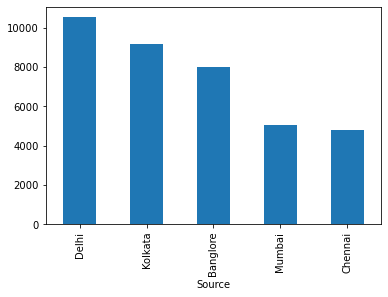

In [225]:
train.groupby('Source')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Destination'>

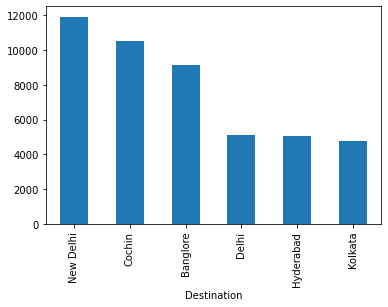

In [226]:
train.groupby('Destination')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

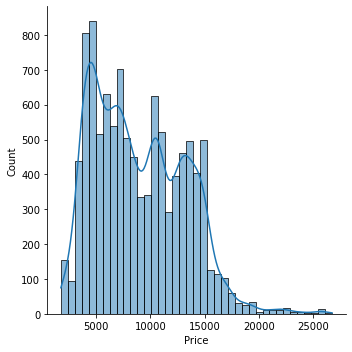

In [281]:
sns.displot(data = train, x = 'Price',kde=True)

<AxesSubplot:xlabel='Dur_Hrs'>

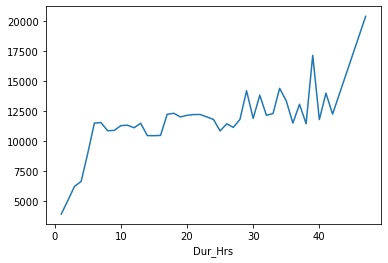

In [258]:
train.groupby('Dur_Hrs')['Price'].mean().plot()

Text(0.5, 1.0, 'Ave Price by Month')

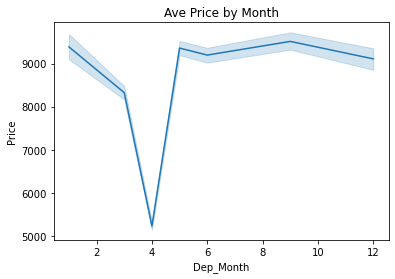

In [301]:
sns.lineplot(data=train,x='Dep_Month',y='Price')
plt.title('Ave Price by Month')

Text(0.5, 1.0, 'Ave Price by Hr')

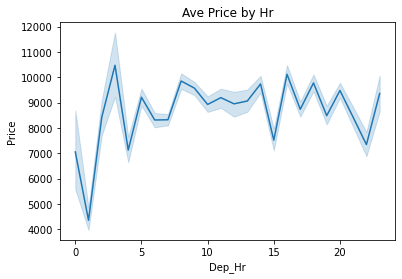

In [302]:
sns.lineplot(data=train,x='Dep_Hr',y='Price')
plt.title('Ave Price by Hr')

Text(0.5, 1.0, 'Ave Price by Day')

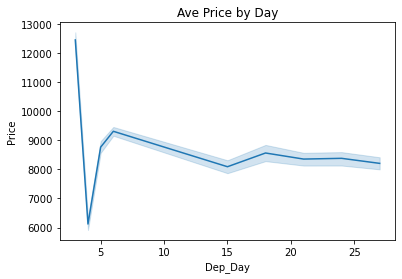

In [303]:
sns.lineplot(data=train,x='Dep_Day',y='Price')
plt.title('Ave Price by Day')

In [209]:
abt = preprocessing(train)

In [210]:
abt.head()

,Total_Stops,Price,Dep_Month,Dep_Day,Dep_Hr,Arrival_Hr,Dur_Hrs,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Other,Trip_Banglore to New Delhi,Trip_Chennai to Kolkata,Trip_Delhi to Cochin,Trip_Kolkata to Banglore,Trip_Mumbai to Hyderabad
0,0,3897,3,24,22,1,2,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,2,7662,1,5,5,13,7,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,13882,9,6,9,4,19,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,6218,12,5,18,23,5,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,13302,1,3,16,21,4,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [211]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10618 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10618 non-null  int64
 1   Price                                         10618 non-null  int64
 2   Dep_Month                                     10618 non-null  int64
 3   Dep_Day                                       10618 non-null  int64
 4   Dep_Hr                                        10618 non-null  int64
 5   Arrival_Hr                                    10618 non-null  int64
 6   Dur_Hrs                                       10618 non-null  int64
 7   Airline_Air India                             10618 non-null  uint8
 8   Airline_GoAir                                 10618 non-null  uint8
 9   Airline_IndiGo                                10618 non-null  uint8
 10  Airline_Je

### Imports for models, train-test-split, metrics

In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [159]:
X = abt.drop('Price',axis=1)
y = abt['Price']

### Split into training and validation sets

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### define parameter grid for cross-validation, tuning of hyperparameters

In [198]:
params = {
    'n_estimators':[100,200,300],
    'max_depth': [30,40,50],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2]
}

In [82]:
rfr = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=3)

rfr.fit(X_train,y_train)

### display results sorted by rank test score

In [84]:
cv_results = pd.DataFrame(rfr.cv_results_)
cv_results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,5.689083,0.197748,0.109333,0.009931,50,1,3,200,"{'max_depth': 50, 'min_samples_leaf': 1, 'min_...",0.885189,0.883467,0.897752,0.891986,0.899455,0.891570,0.006433,1
16,6.153616,0.125996,0.128767,0.017566,40,1,3,200,"{'max_depth': 40, 'min_samples_leaf': 1, 'min_...",0.885189,0.883467,0.897752,0.891986,0.899455,0.891570,0.006433,1
4,6.536516,0.444127,0.120080,0.016383,30,1,3,200,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.885179,0.883448,0.897743,0.891984,0.899445,0.891560,0.006436,3
17,9.355067,0.160654,0.183437,0.018808,40,1,3,300,"{'max_depth': 40, 'min_samples_leaf': 1, 'min_...",0.884990,0.882744,0.897700,0.891812,0.900241,0.891497,0.006841,4
29,8.762255,0.342585,0.161095,0.003532,50,1,3,300,"{'max_depth': 50, 'min_samples_leaf': 1, 'min_...",0.884990,0.882744,0.897700,0.891812,0.900241,0.891497,0.006841,4


### create model with best hyperparameters

In [167]:
rfr2 = RandomForestRegressor(n_estimators=200,max_depth=50,min_samples_split=3,min_samples_leaf=1)

In [170]:
rfr2.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=200)

### use model to predict on validation set

In [172]:
preds = rfr2.predict(X_test)

### evaluate predictions

In [173]:
print('MAE: ',mean_absolute_error(y_test,preds))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,preds)))
print('MSE: ',mean_squared_error(y_test,preds))

MAE:  754.8350836628629
RMSE:  1384.4552044969062
MSE:  1916716.2132585703


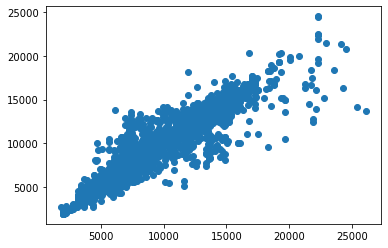

In [174]:
plt.scatter(y_test,preds)

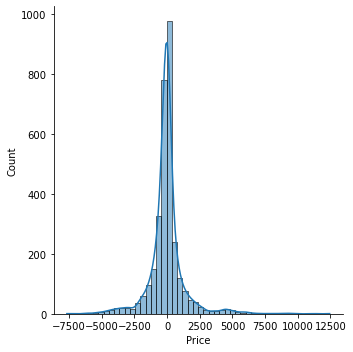

In [175]:
sns.displot((y_test-preds),bins=50,kde=True)

In [176]:
results_df = pd.DataFrame({'actual':y_test,'predictions':preds})

In [177]:
results_df.head(20)

,actual,predictions
2254,10844,10837.137500
10459,3625,3120.037500
368,5162,5316.977821
9536,3419,3973.638333
3094,5998,6464.552917
10451,10844,10810.445000
7365,10756,10602.506750
8556,15136,15806.526714
7471,10262,10262.000000
10358,11982,11982.000000


### Get feature importances

<AxesSubplot:>

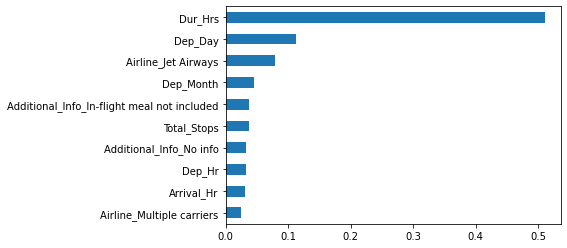

In [104]:
features = X_train.columns
importances = rfr.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=features)

feat_imp.sort_values().tail(10).plot(kind='barh')

In [107]:
mae_rf = mean_absolute_error(y_test, rfr.predict(X_test))
rmse_rf = np.sqrt(mean_squared_error(y_test, rfr.predict(X_test)))
print('MAE: ',round(mae_rf))
print('RMSE: ', round(rmse_rf))

MAE:  753
RMSE:  1384


### run model on unseen test data

In [197]:
test_data = raw_test_data.copy()

In [181]:
test_data = preprocessing(test_data)

In [182]:
test_preds = rfr2.predict(test_data)

In [132]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


### apply Price Predictions to test dataframe

In [184]:
test_final = raw_test_data.copy()

In [185]:
test_final['Price_Predict'] = test_preds

In [187]:
test_final['Price_Predict'] = test_final['Price_Predict'].apply(lambda x: round(x,2))

In [188]:
test_final.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price_Predict
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,14672.55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4276.92
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,12898.00
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,12168.57
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,3482.75
